## 104/ Bit Depth

The pixels have coordinates but also values. In the simple case of a grayscale image, each pixel has only one value.

> *This value is often the intensity of the signal in the case of a fluorescence image.*

The range of these values is depending on the bit depth chosen by the user or decided by the device used to produce the image.

> *For example, a pixel of an 8-bit image has 2<sup>8</sup> or 256 possible values, ranging from 0 to 255.*

**Here are several images with different bitdepth**

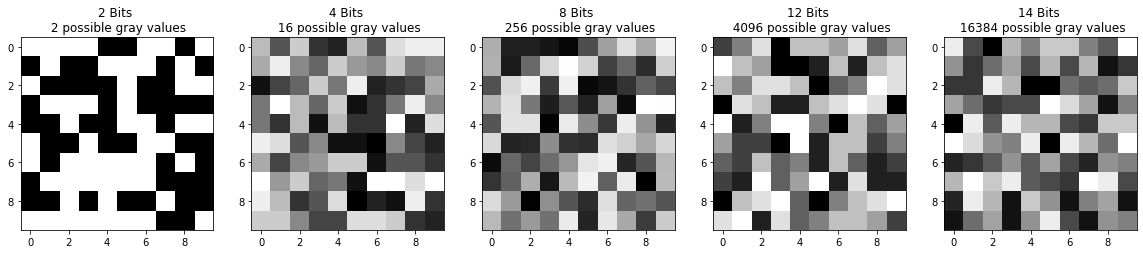

In [1]:
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt

big_image = io.imread('images/first-instar-brain.tif')

df_2bit = pd.DataFrame(np.random.randint(0,2,size=(10, 10)))
df_4bit = pd.DataFrame(np.random.randint(0,16,size=(10, 10)))
df_8bit = pd.DataFrame(np.random.randint(0,255,size=(10, 10)))
df_12bit = pd.DataFrame(np.random.randint(0,2^12-1,size=(10, 10)))
df_14bit = pd.DataFrame(np.random.randint(0,2^14-1,size=(10, 10)))

fig = plt.figure(figsize=(20,20))

fig.add_subplot(1,5,1)
plt.title('2 Bits \n 2 possible gray values')
plt.imshow(df_2bit, cmap='gray')

fig.add_subplot(1,5,2)
plt.title('4 Bits \n 16 possible gray values')
plt.imshow(df_4bit,cmap='gray')

fig.add_subplot(1,5,3)
plt.title('8 Bits \n 256 possible gray values')
plt.imshow(df_8bit,cmap='gray')

fig.add_subplot(1,5,4)
plt.title('12 Bits \n 4096 possible gray values')
plt.imshow(df_12bit,cmap='gray')

fig.add_subplot(1,5,5)
plt.title('14 Bits \n 16384 possible gray values')
plt.imshow(df_14bit,cmap='gray');

----
**Here is an interactive example on bit depth**

Notice the loss of information when decreasing from 16 bits to 1 bit. Use the menu to view the images with a different color palette.

> *Unless you are using some very special display, you will not notice any differences between 12 and 16 bits using the standard gray levels color map*. 

> *You can select a different color map using the dropdown menu to better see the effect of decreasing the bit depth*.

> *Generally computer monitors are able to display between 8 to 12 bits of color, but the human eye can barely notice any difference past 900 levels (around 10 bit) in optimal conditions anyways*.<sup>1</sup>

In [3]:
from skimage import exposure
from skimage.util import img_as_uint
from ipywidgets import *

df_16bit = np.random.randint(0,2**16-1,size=(50, 50))
df_16bit.sort(axis=1)

real_image = io.imread('./images/m51.tif')

cmap_options = ['gray', 'viridis', 'jet', 'hot', 'coolwarm', 'seismic',
           'terrain', 'bone', 'twilight', 'ocean', 'RdBu', 'nipy_spectral']

def draw_fig_at_bit(c_map, bit):
    df_bit = exposure.rescale_intensity(df_16bit, out_range=(0, 2**bit - 1))
    real_image_bit = exposure.rescale_intensity(real_image, out_range=(0, 2**bit - 1))
    fig = plt.figure(figsize=(15,10))
    fig.add_subplot(1,2,1)
    plt.title(f'Synthetic image \n {bit} Bit(s) \n {2**bit} possible gray values')
    plt.imshow(df_bit, cmap=c_map,vmin=0, vmax=2**bit-1)
    
    fig.add_subplot(1,2,2)
    plt.title(f'A native 16-bit image: the M51 galaxy \n {bit} Bit(s) \n {2**bit} possible gray values')
    plt.imshow(real_image_bit, cmap=c_map,vmin=0, vmax=2**bit-1)

interact(
    draw_fig_at_bit,
    bit = widgets.SelectionSlider(
    options=[16,12,10,8,6,4,2,1],
    value=16,
    description='Bit depth: ',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True
),
    c_map = widgets.Dropdown(options=cmap_options, value=cmap_options[11], description='Color Map'));

interactive(children=(Dropdown(description='Color Map', index=11, options=('gray', 'viridis', 'jet', 'hot', 'c…

<sup>1</sup> Kimpe, T., & Tuytschaever, T. (2007). *Increasing the number of gray shades in medical display systems--how much is enough?*. Journal of digital imaging, 20(4), 422–432. https://doi.org/10.1007/s10278-006-1052-3